<a href="https://colab.research.google.com/github/JuliMillan/Diversidad_rol/blob/main/Diversidad_rol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importamos paquetes

In [1]:
!pip install squarify
!pip install plotly==5.1.0 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import string
import matplotlib.patches as mpatches
from scipy import stats
import folium
import scipy.stats as ss
import squarify
#plt.rcParams.update({'font.size':14})
#from google.colab import files
import plotly.express as px
import plotly.graph_objects as go

     |████████████████████████████████| 20.6MB 2.1MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


###Correr si no tenés montado GDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Funciones útiles

In [3]:
def normalidad(datos, alfa):
  """
  Ingresar los datos como un array de numpy
  """
  k2, p = stats.normaltest(edades, nan_policy='omit')
  print("p = {:g}".format(p))
  if p < alpha:  # Hipótesis nula: la distribución proviene de una distribución Guassiana
    print("La distribución no es normal")
  else:
    print("La distribución parece normal")

def pie_plot(datos, explode, titulo, color=sns.color_palette('Set2')):
  """
  datos: serie de pandas; 
  explode: array de valores con la cantidad de variables 
  """
  d = datos.value_counts()
  pie, ax = plt.subplots(figsize=[10,6])
  labels=d.keys()
  plt.pie(x=d, autopct='%.1f%%', 
          explode=explode, labels=labels, 
          pctdistance=0.5, startangle=90,
          colors = color)
  ax.axis('equal')
  plt.title('{}'.format(titulo), fontsize=14, pad=30.0)
  plt.tight_layout()
  return plt.show()

def heat_map(columna_1, columna_2):
  matriz = pd.crosstab(index=columna_1, columns=columna_2)
  fig = sns.heatmap(matriz)
  return matriz, fig

def tree_plot(datos, columna, titulo):
  """
  datos: dataframe df['columna']
  columna: 'columna'
  """
  d = pd.DataFrame(datos.value_counts().reset_index())
  d.columns = [columna, 'conteo']
  color=sns.color_palette("inferno")
  fig, ax = plt.subplots(figsize=(10, 6))
  squarify.plot(sizes=d['conteo'], label=d[columna], alpha=.7, color=color)
  plt.axis('off')
  plt.title('{}'.format(titulo), fontsize=14)
  return plt.show()

def violin_plot(columna1, columna2, paleta, titulo, xlabel, ylabel):
  """
  columna1 y 2: df.columna
  """
  f, ax = plt.subplots(figsize=(10, 7))
  sns.violinplot(x=columna1, y=columna2, palette=paleta, inner='stick')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  plt.title('{}'.format(titulo), fontsize=14)
  plt.xlabel('{}'.format(xlabel))
  plt.ylabel('{}'.format(ylabel))
  return plt.show()

def barplot(columna1, columna2, d):
  """
  Gráfico de barra con la cantidad de valores
  """
  fig, ax = plt.subplots(figsize=(10,6))
  sns.barplot(x=columna1, y=columna2, data=d)
  for p in ax.patches:
    _x = p.get_x() + p.get_width() + .4
    _y = p.get_y() + p.get_height()
    value = int(p.get_width())
    ax.text(_x, _y, value, ha="left", va='bottom')
  plt.xticks([])
  plt.xlabel('')
  plt.ylabel('')
  return plt.show()

def count_plot_vertical(columna1, columna2, df,paleta, xlabel='', ylabel='Cantidad', tamano=(6,6)):
  """
  columna1: df['columna1']
  columna2: "columna"
  """
  orden=columna1.value_counts().index
  total=columna1.count()
  fig, ax = plt.subplots(figsize=tamano)
  sns.countplot(x=columna2, data=df, palette=paleta, order=orden)
  #Para mostrar los valores sobre las barras verticales
  for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = "{:.1f}%".format((int(p.get_height())*100)/total)
    ax.text(_x, _y, value, ha="center") 
  plt.xlabel('{}'.format(xlabel))
  plt.ylabel('{}'.format(ylabel))
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  return plt.show()

def cramers_v(x, y):
  """
  Correlacióón entre variables categóricas
  """
  confusion_matrix = pd.crosstab(x,y)
  chi2 = ss.chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
  rcorr = r-((r-1)**2)/(n-1)
  kcorr = k-((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def matriz_corr(df_corr, dataframe):
  """
  df_corr: dataframe con los valores de correlación
  dataframe: original
  """
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111)
  cax = ax.matshow(df_corr,cmap='viridis', vmin=-1, vmax=1)
  fig.colorbar(cax)
  ticks = np.arange(0,len(dataframe.columns),1)
  ax.set_xticks(ticks)
  plt.xticks(rotation=90)
  ax.set_yticks(ticks)
  ax.set_xticklabels(dataframe.columns)
  ax.set_yticklabels(dataframe.columns)
  return plt.show()

##Exploramos los datos

In [4]:
archivo = "/content/drive/MyDrive/Respuestas.csv"
df = pd.read_csv(archivo)
df.head(3)

,Marca temporal,Qué edad tenés?,Qué juego/s jugás?,Participás como,Con qué género te identificás?,"En relación al género que se te asignó al nacer, te considerás",Cuál es tu orientación sexual?,Alguna vez sufriste discriminación (como jugadorx) por tu género u orientación sexual durante una partida?,Presenciaste algún tipo de discriminación hacia otra persona?,"En caso de haber sufrido/presenciado casos de discriminación, reaccionaste de alguna manera?",Tus grupos de juego normalmente están conformados por,En qué país naciste?,En qué país vivís?
0,16/06/2021 22:13:54,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,17/06/2021 10:11:50,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,17/06/2021 10:25:49,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 13 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Marca temporal                                                                                               165 non-null    object 
 1   Qué edad tenés?                                                                                              155 non-null    float64
 2   Qué juego/s jugás?                                                                                           164 non-null    object 
 3   Participás como                                                                                              164 non-null    object 
 4   Con qué género te identificás?                                

In [6]:
df.columns = [
              'fecha', 'edad', 'juegos', 'rol', 'genero', 'identidad', 'sexualidad', 
              'discriminacion_personal', 'discriminacion_otre', 'reaccion',
              'grupo', 'nacimiento', 'residencia'
              ]

df.head(3)

,fecha,edad,juegos,rol,genero,identidad,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
0,16/06/2021 22:13:54,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,17/06/2021 10:11:50,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,17/06/2021 10:25:49,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


In [7]:
df1 = df.iloc[:,1:13]
df1.head(3)

,edad,juegos,rol,genero,identidad,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
0,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No estoy segurx,No estoy segurx,Sí,Mayoría de varones,Argentina,Argentina
1,29.0,Dungeons & Dragons 5E,Jugadorx,Mujer,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina
2,32.0,"Dungeons & Dragons 5E, Dungeons & Dragons 3.5",Ambos,Varón,Cis,Heterosexual,No,No,NaN,Mayoría de varones,Argentina,Argentina


##Edades y género

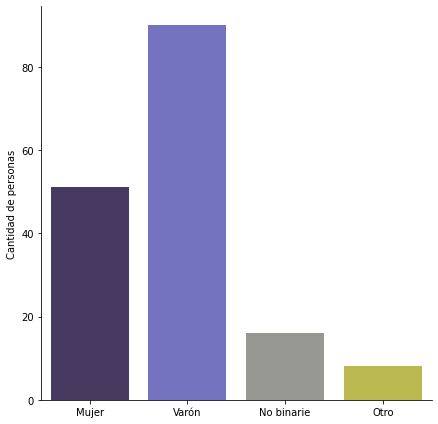

In [8]:
figure = sns.catplot(x="genero", kind="count", palette="gist_stern", 
                     data=df1, order=['Mujer', 'Varón', 'No binarie','Otro'], height=6)
plt.xlabel('')
plt.ylabel('Cantidad de personas')
#plt.savefig("1.jpg",bbox_inches='tight')
#files.download("1.jpg") 
plt.show()

In [9]:
edades = (df1['edad'])
#print(edades)
#print(edades.shape)
#print(type(edades))
print(edades.describe())
edades_np = edades.dropna()
edades_np = edades_np.to_numpy()
#print(type(edades_np))
print(edades_np.mean())


count    155.000000
mean      30.380645
std        6.687137
min       16.000000
25%       26.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: edad, dtype: float64
30.38064516129032


In [10]:
mediana = (edades.median())
print('La edad más representada es {} años, con {} personas.'.format(int(mediana), np.sum([df1['edad']==mediana])))

La edad más representada es 30 años, con 17 personas.


In [11]:
edad_maxima = int(edades.max())
edad_minima = int(edades.min())
print('Edad máxima: ', edad_maxima ,'\nEdad mínima: ', edad_minima)

Edad máxima:  51 
Edad mínima:  16


In [12]:
alpha = 1e-3
normalidad(edades_np, alpha)

p = 0.199796
La distribución parece normal


In [13]:
edades_genero = df1[['edad', 'genero']]
#edades_genero.head(3)

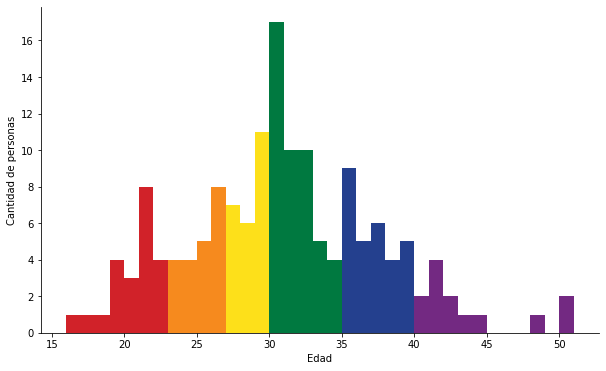

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
bin=(edad_maxima-edad_minima)

N, bins, patches = ax.hist(edades, bins=bin)

for i in range(0,7):
    patches[i].set_facecolor('#D12229')
for i in range(7,11):    
    patches[i].set_facecolor('#F68A1E')
for i in range(11,16):
    patches[i].set_facecolor('#FDE01A')
for i in range(14,19):
    patches[i].set_facecolor('#007940')
for i in range(19,24):    
    patches[i].set_facecolor('#24408E')
for i in range(24, len(patches)):
    patches[i].set_facecolor('#732982')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')
plt.show()

In [15]:
edades_m = edades_genero[edades_genero['genero']=='Mujer'].dropna()
edades_v = edades_genero[edades_genero['genero']=='Varón'].dropna()
edades_nb = edades_genero[edades_genero['genero']=='No binarie'].dropna()
edades_o = edades_genero[edades_genero['genero']=='Otro'].dropna()

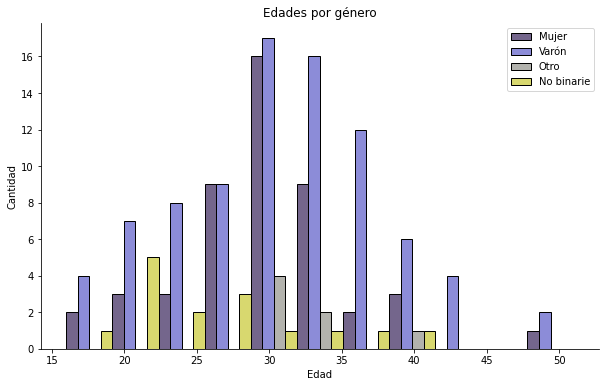

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.histplot(data=edades_genero, x="edad", hue="genero", 
                      multiple="dodge", palette='gist_stern')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title('Edades por género')
fig.get_legend().set_title(None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


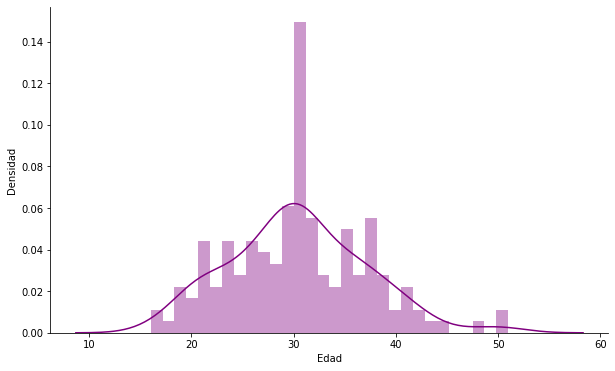

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
fig = sns.distplot(edades_genero['edad'], bins=30, color='purple')
plt.xlabel('Edad')
plt.ylabel('Densidad')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

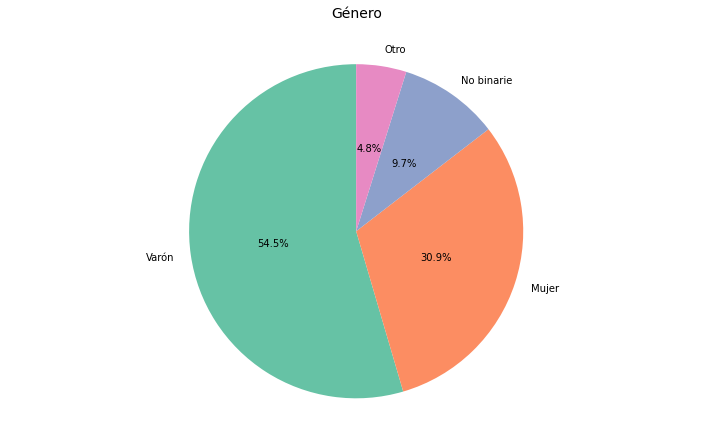

In [18]:
pie_plot(df1['genero'], np.zeros(4), 'Género')

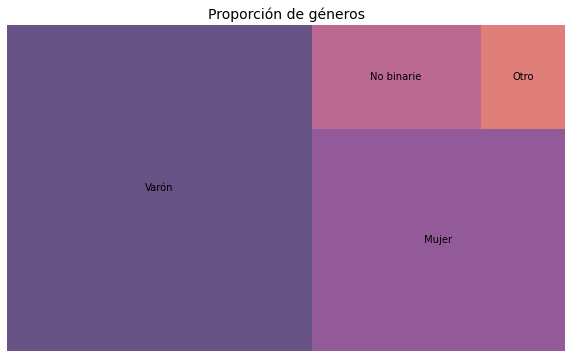

In [19]:
tree_plot(df1['genero'], 'genero', 'Proporción de géneros')

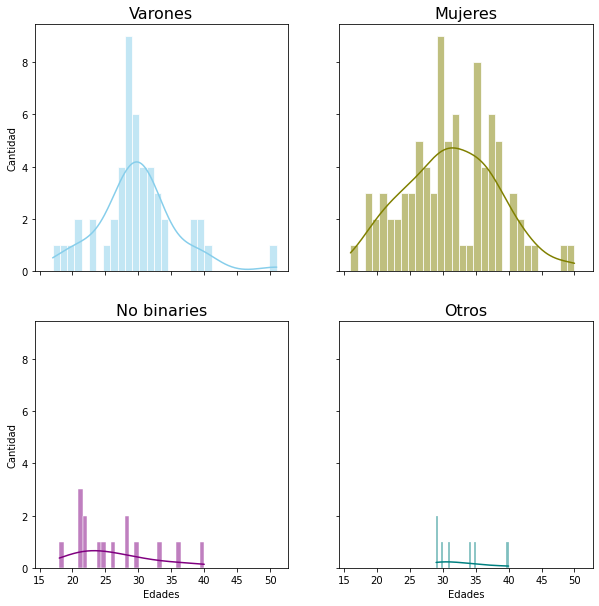

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
bins=31

with sns.axes_style("darkgrid"):
  sns.histplot(edades_m, x="edad", kde=True, color="skyblue", ax=axs[0, 0], bins=bins).set_title('Varones', size=16)
  sns.histplot(edades_v, x="edad", kde=True, color="olive", ax=axs[0, 1], bins=bins).set_title('Mujeres', size=16)
  sns.histplot(edades_nb, x="edad", kde=True, color="purple", ax=axs[1, 0], bins=bins).set_title('No binaries', size=16)
  sns.histplot(edades_o, x="edad", kde=True, color="teal", ax=axs[1, 1],bins=bins).set_title('Otros', size=16)

  plt.setp(axs[-1, :], xlabel='Edades')
  plt.setp(axs[:, 0], ylabel='Cantidad')
  plt.show()

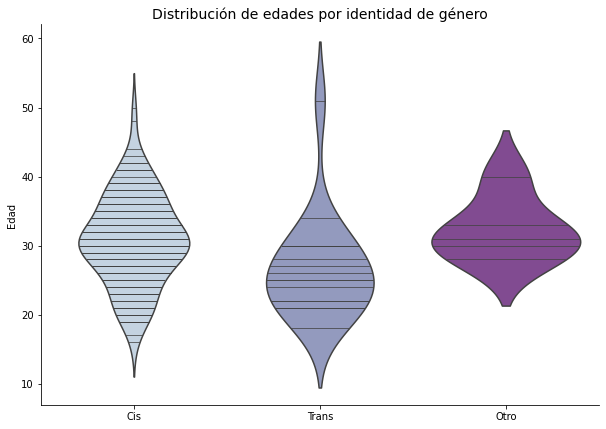

In [21]:
#Violin plot usando la función definida previamente
violin_plot(df1.identidad, df1.edad, "BuPu",'Distribución de edades por identidad de género','','Edad')

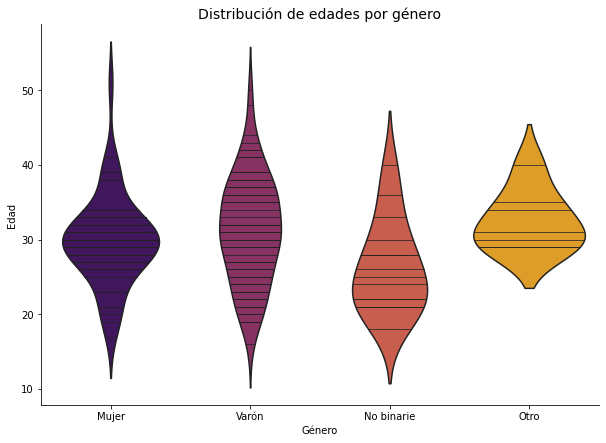

In [22]:
#Violin plot cambiando el orden de los datos
f, ax = plt.subplots(figsize=(10, 7))
sns.violinplot(x=df1.genero, y=df1.edad, palette="inferno", inner='stick', order=['Mujer', 'Varón', 'No binarie','Otro'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Distribución de edades por género', fontsize=14)
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

##Juegos

In [23]:
juegos1 = df['juegos'].dropna()
#Armo la lista con todos los juegos nombrados por separado
juegos = [j.split(';') for j in juegos1]
flat_list = [item for sublist in juegos for item in sublist]
juegos_ = [i.split(', ') for i in flat_list]
jj = [item for sublist in juegos_ for item in sublist]
print(len(jj))

410


In [24]:
#Cuento la cantidad de veces que aparece un juego
contador = Counter(jj)
#Uso los juegos que más aparecen para armar un dataframe
mas_comunes = contador.most_common(11)
juegos_mas_comunes = pd.DataFrame(mas_comunes)
juegos_mas_comunes
print(mas_comunes)

[('Dungeons & Dragons 5E', 103), ('La Llamada de Cthulhu', 43), ('Vampiros', 40), ('Pathfinder', 40), ('Dungeons & Dragons 3.5', 38), ('Hombre Lobo', 10), ('GURPS', 9), ('PbtA', 8), ('Homebrew', 5), ('Warhammer', 5), ('Indies', 5)]


In [25]:
#Armo un dataframe con los juegos más comunes y la cantidad de veces que aparecen
datos = pd.DataFrame(mas_comunes)
datos.columns=['juego', 'cantidad']
datos

,juego,cantidad
0,Dungeons & Dragons 5E,103
1,La Llamada de Cthulhu,43
2,Vampiros,40
3,Pathfinder,40
4,Dungeons & Dragons 3.5,38
5,Hombre Lobo,10
6,GURPS,9
7,PbtA,8
8,Homebrew,5
9,Warhammer,5


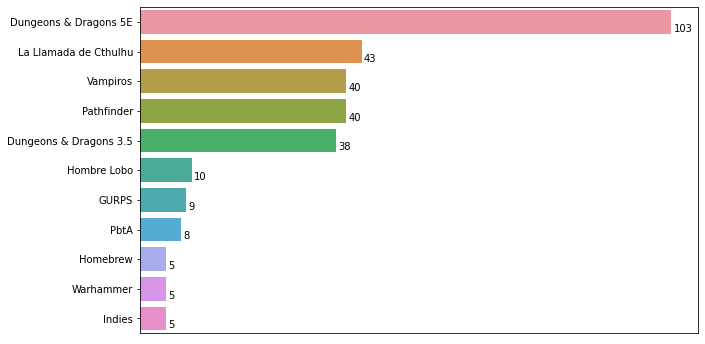

In [26]:
barplot('cantidad','juego', datos)

In [27]:
#Agrego al dataframe una columna con los porcentajes
total = len(jj)
datos['porcentaje'] = ((datos['cantidad']*100)/total)
datos

,juego,cantidad,porcentaje
0,Dungeons & Dragons 5E,103,25.121951
1,La Llamada de Cthulhu,43,10.487805
2,Vampiros,40,9.756098
3,Pathfinder,40,9.756098
4,Dungeons & Dragons 3.5,38,9.268293
5,Hombre Lobo,10,2.439024
6,GURPS,9,2.195122
7,PbtA,8,1.951220
8,Homebrew,5,1.219512
9,Warhammer,5,1.219512


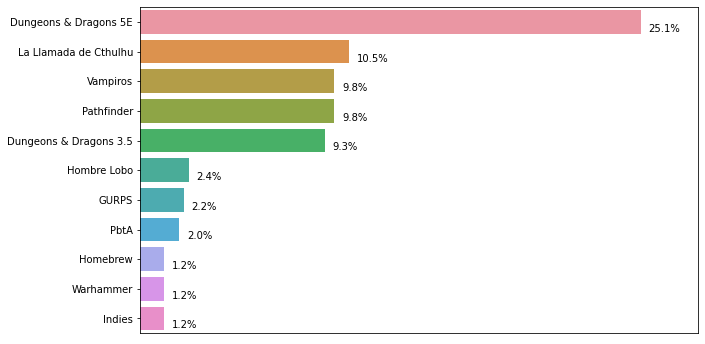

In [28]:
#Gráfico de barras con porcentaje
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='porcentaje', y='juego', data=datos)
#Para mostrar los valores a la derecha de las barras horizontales, en formato porcentaje
for p in ax.patches:
  _x = p.get_x() + p.get_width() + .4
  _y = p.get_y() + p.get_height()
  value = "{:.1f}%".format(p.get_width())
  ax.text(_x, _y, value, ha="left", va='bottom')
plt.xticks([])
plt.xlim([0,28]) #alargo un poco el eje para que no toque el número
plt.xlabel('')
plt.ylabel('')
plt.show()

##Identidad de género

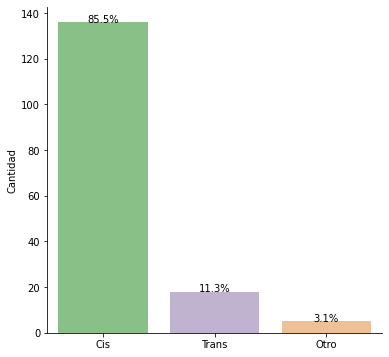

In [29]:
count_plot_vertical(df1['identidad'],'identidad',df1,'Accent')

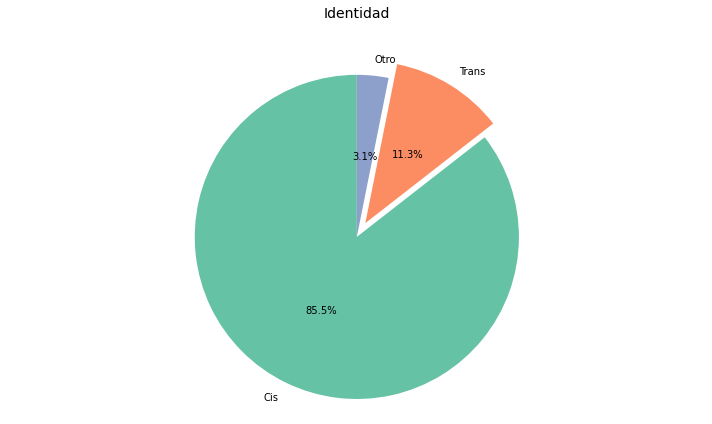

In [30]:
pie_plot(df1['identidad'],[0,.1,0], 'Identidad')

##Sexualidad

In [31]:
df1['sexualidad'].value_counts()

Heterosexual    84
Bisexual        46
Homosexual      12
Otro             8
Pansexual        8
Asexual          7
Name: sexualidad, dtype: int64

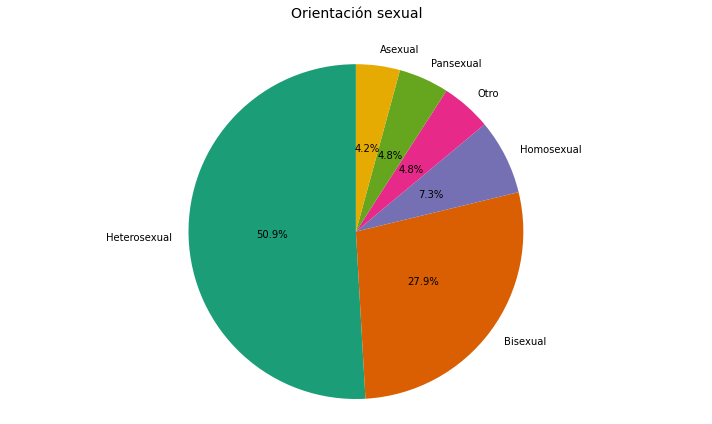

In [32]:
pie_plot(df1['sexualidad'], np.zeros(6), 'Orientación sexual', sns.color_palette("Dark2"))

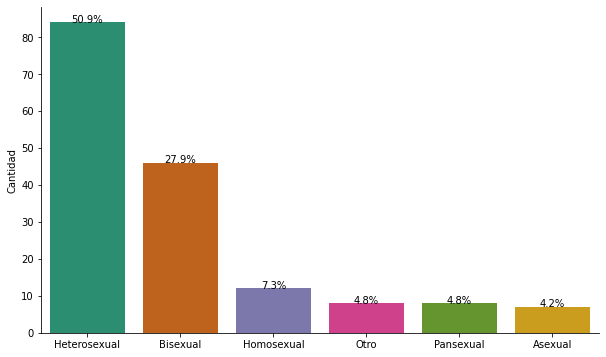

In [33]:
count_plot_vertical(df1['sexualidad'], 'sexualidad', df1, 'Dark2',tamano=(10,6))

##Discriminación

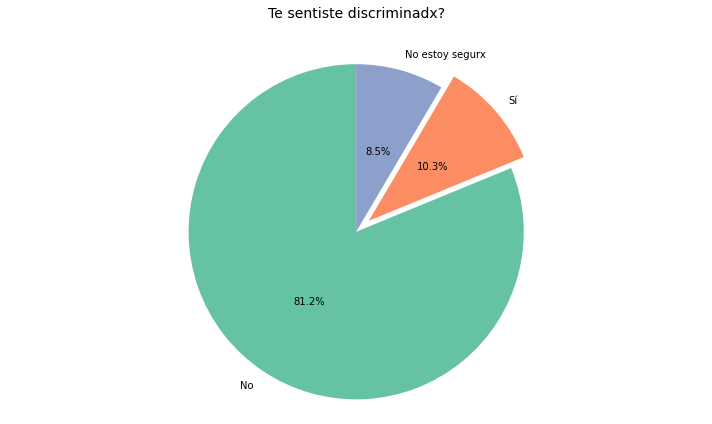

In [34]:
pie_plot(df1['discriminacion_personal'], [0,.1,0], 'Te sentiste discriminadx?')

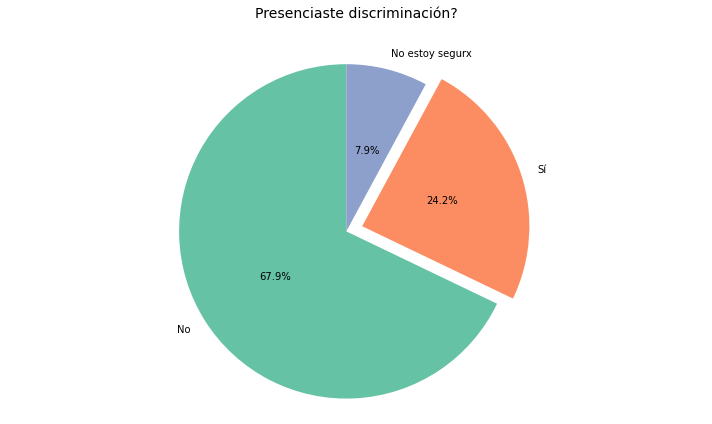

In [35]:
pie_plot(df1['discriminacion_otre'], [0,.1,0], 'Presenciaste discriminación?')

De ese porcentaje de gente que sufrió o presenció discriminación, un 50% reaccionó frente a ella

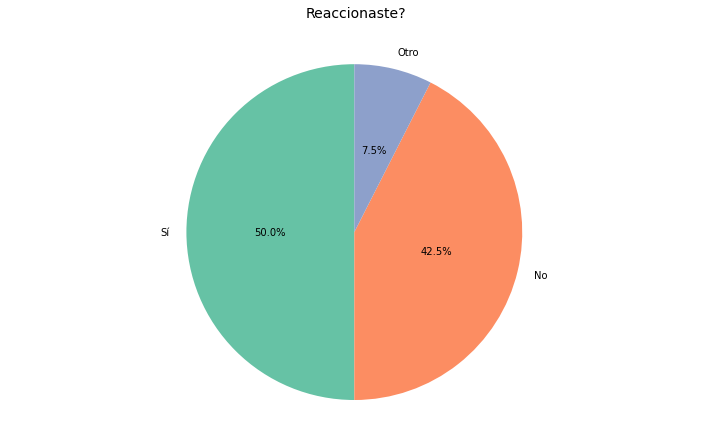

In [36]:
pie_plot(df1['reaccion'], np.zeros(3), 'Reaccionaste?')

##Grupos

Sorprendentemente, no recibí respuestas en la que hablen de grupos unicamente de mujeres.

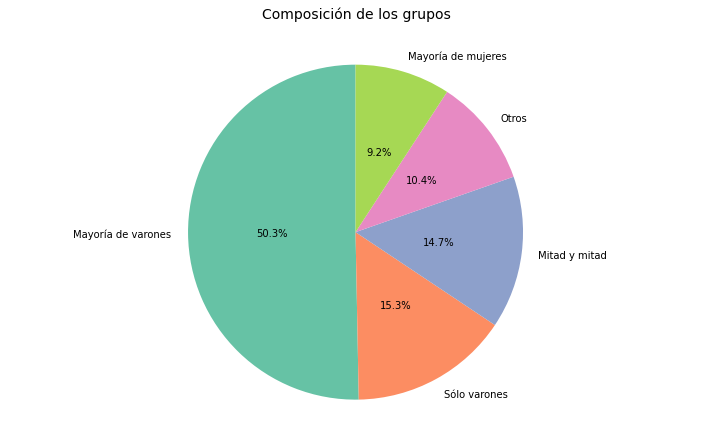

In [37]:
pie_plot(df1['grupo'], np.zeros(5), 'Composición de los grupos')

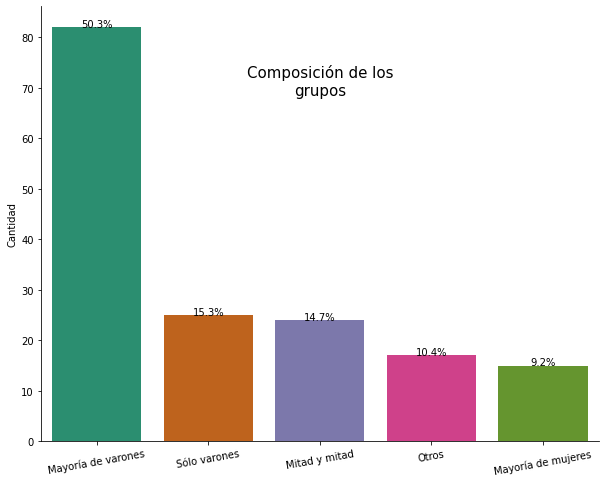

In [38]:
total=df1['grupo'].count()
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x="grupo", data=df1, palette='Dark2', order=df1['grupo'].value_counts().index)
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height()
  value = '{:.1f}%'.format(int(p.get_height()*100)/total)
  ax.text(_x, _y, value, ha="center") 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('')
plt.xticks(rotation=10, ha='center') #Rotar las etiquetas del eje x para que no se superpongan
plt.ylabel('Cantidad')
#Personalizar la localización del título
ax.set_title('Composición de los\ngrupos', fontsize=15, loc='center', y=0.9,  pad= -45)
plt.show()

##Correlaciones

Mientras más grande sea el valor, y más cerca del color amarillo esté, es porque esas dos preguntas presentan una relación directa mayor

###Pearson's

In [39]:
#Correlación pearson entre todas las variables
corr = df1.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr

,edad,juegos,rol,genero,identidad,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
edad,1.000000,0.175544,0.025244,0.058070,0.068485,0.082292,0.061083,0.047022,0.039032,-0.099426,0.046861,0.140111
juegos,0.175544,1.000000,0.078545,0.214467,0.106707,0.058925,0.039489,0.108198,0.135015,0.153305,-0.038142,0.050352
rol,0.025244,0.078545,1.000000,0.163270,-0.010532,0.029493,-0.084374,0.174620,-0.063256,-0.139194,-0.064894,0.005425
genero,0.058070,0.214467,0.163270,1.000000,0.486408,0.271157,0.100795,-0.002595,0.026584,0.207076,0.002649,0.132131
identidad,0.068485,0.106707,-0.010532,0.486408,1.000000,0.437361,0.044882,0.031343,0.016190,0.159892,0.059424,0.135348
sexualidad,0.082292,0.058925,0.029493,0.271157,0.437361,1.000000,0.038524,0.050725,0.040899,0.255135,0.104952,0.016716
discriminacion_personal,0.061083,0.039489,-0.084374,0.100795,0.044882,0.038524,1.000000,0.142084,0.026562,0.096298,-0.025030,-0.024152
discriminacion_otre,0.047022,0.108198,0.174620,-0.002595,0.031343,0.050725,0.142084,1.000000,0.165989,0.206108,-0.188794,-0.100991
reaccion,0.039032,0.135015,-0.063256,0.026584,0.016190,0.040899,0.026562,0.165989,1.000000,-0.031225,0.020820,0.058178
grupo,-0.099426,0.153305,-0.139194,0.207076,0.159892,0.255135,0.096298,0.206108,-0.031225,1.000000,-0.051252,0.066094


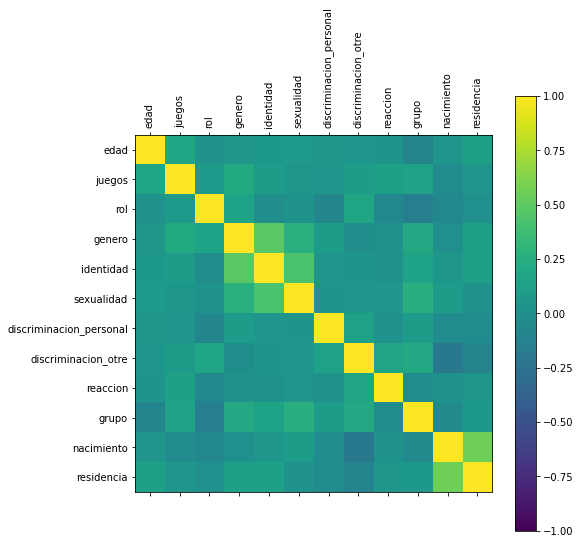

In [40]:
matriz_corr(corr,df1)

###Cramer's

In [41]:
rows= []
for var1 in df1:
  col = []
  for var2 in df1:
    cramers =cramers_v(df1[var1], df1[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
cr = pd.DataFrame(cramers_results, columns = df1.columns, index =df1.columns)
cr

,edad,juegos,rol,genero,identidad,sexualidad,discriminacion_personal,discriminacion_otre,reaccion,grupo,nacimiento,residencia
edad,1.00,0.15,0.17,0.15,0.18,0.26,0.00,0.13,0.25,0.22,0.31,0.36
juegos,0.15,1.00,0.26,0.35,0.36,0.05,0.39,0.25,0.22,0.28,0.36,0.32
rol,0.17,0.26,1.00,0.20,0.00,0.08,0.00,0.15,0.00,0.08,0.14,0.11
genero,0.15,0.35,0.20,1.00,0.53,0.41,0.23,0.00,0.00,0.27,0.00,0.06
identidad,0.18,0.36,0.00,0.53,1.00,0.34,0.13,0.00,0.00,0.26,0.16,0.24
sexualidad,0.26,0.05,0.08,0.41,0.34,1.00,0.16,0.00,0.00,0.13,0.11,0.02
discriminacion_personal,0.00,0.39,0.00,0.23,0.13,0.16,1.00,0.19,0.06,0.11,0.00,0.00
discriminacion_otre,0.13,0.25,0.15,0.00,0.00,0.00,0.19,1.00,0.41,0.08,0.22,0.28
reaccion,0.25,0.22,0.00,0.00,0.00,0.00,0.06,0.41,1.00,0.00,0.00,0.00
grupo,0.22,0.28,0.08,0.27,0.26,0.13,0.11,0.08,0.00,1.00,0.07,0.15


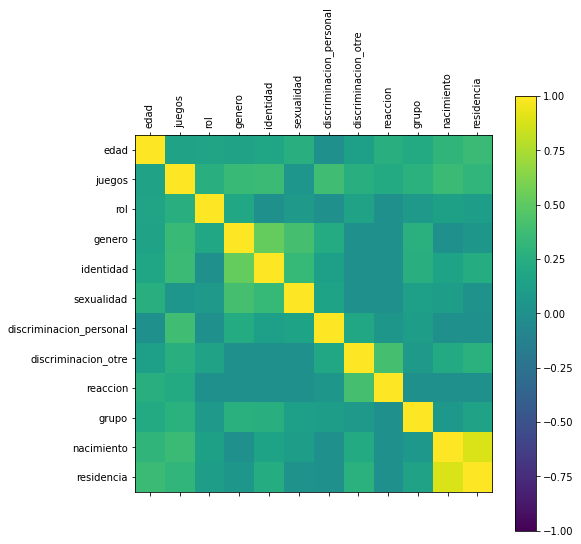

In [42]:
matriz_corr(cr,df1)

In [43]:
gen_disc = cramers_v(df1['genero'], df1['discriminacion_personal'])
print('La relación entre el género y sentirse discriminade es {:.2}'.format(gen_disc))

La relación entre el género y sentirse discriminade es 0.23


In [44]:
cramers_v(df1['identidad'], df1['discriminacion_personal'])

0.13121727444585074

###Crosstab

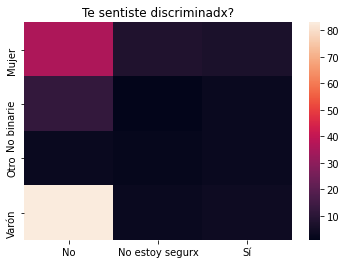

In [45]:
pd.crosstab(index=df1['genero'],columns=df1['discriminacion_personal'])
heat_map(df1['genero'],df1['discriminacion_personal'])
plt.title('Te sentiste discriminadx?')
plt.ylabel('')
plt.xlabel('')
plt.show()

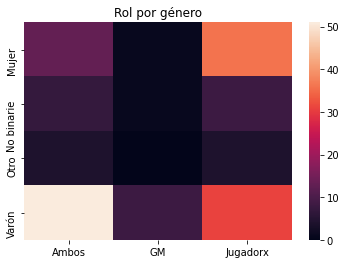

In [46]:
heat_map(df1['genero'], df1['rol'])
plt.title('Rol por género')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [47]:
(pd.crosstab(index=df1['identidad'],columns=df1['grupo'])).sort_values(by=['Mayoría de varones'], ascending=False)

grupo,Mayoría de mujeres,Mayoría de varones,Mitad y mitad,Otros,Sólo varones
identidad,,,,,
Cis,8,69,22,12,23
Trans,7,6,1,4,0
Otro,0,4,0,1,0


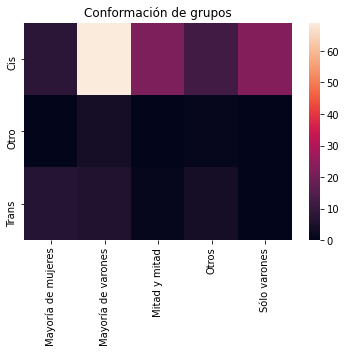

In [48]:
heat_map(df1['identidad'], df1['grupo'])
plt.title('Conformación de grupos')
plt.ylabel('')
plt.xlabel('')
plt.show()

In [49]:
pd.crosstab(index=df1['genero'],columns=df1['grupo'])

grupo,Mayoría de mujeres,Mayoría de varones,Mitad y mitad,Otros,Sólo varones
genero,,,,,
Mujer,7,28,9,5,1
No binarie,4,5,0,6,1
Otro,0,4,1,3,0
Varón,4,45,14,3,23


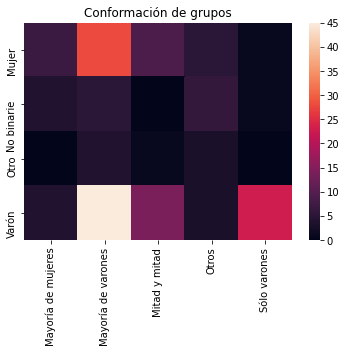

In [50]:
heat_map(df1['genero'], df1['grupo'])
plt.title('Conformación de grupos')
plt.ylabel('')
plt.xlabel('')
plt.show()

##Múltiples variables

Si bien es dificil de observar en los gráficos, una respuesta que recibí bastante es que, cuando se trata de identidades queer u otro tipo de disidencias, la idea siempre es rodearse de identidades similares y alejarse de los grupos conformados unicamente por gente hetero-cis para sentirse comodxs. 
Muy probablemente este sea el motivo por el que la mayor cantidad de respuestas positivas sobre haber sufrido discriminación se da entre mujeres cis: nosotras tendemos a jugar más con grupos de varones cis.

###Pandas barras horizontales

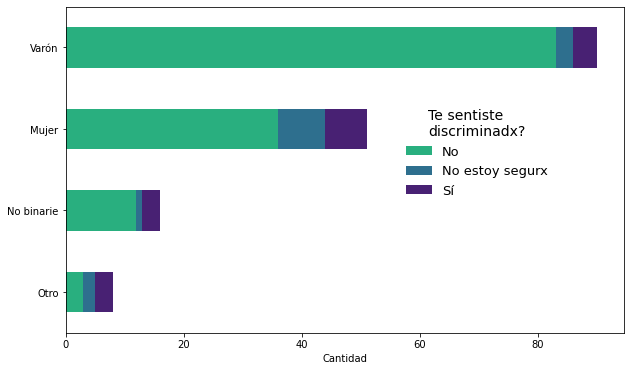

In [51]:
colors = ['#29af7f','#2e6f8e','#482173']
fig = (pd.crosstab(index=df1['genero'],columns=df1['discriminacion_personal'])).sort_values(by=['No']).plot.barh(stacked=True, figsize=(10,6), color=colors)
plt.legend(title='Te sentiste\ndiscriminadx?', title_fontsize=14, loc=(.6,.4), fontsize=13, frameon=False)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()

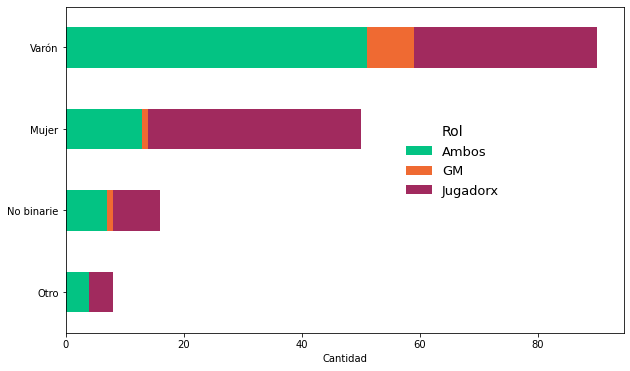

In [52]:
colors = ['#03c383','#ef6a32','#a12a5e']
fig = (pd.crosstab(index=df1['genero'],columns=df1['rol'])).sort_values(by=['Ambos']).plot.barh(stacked=True, figsize=(10,6), color=colors)
plt.legend(title='Rol', title_fontsize=14, loc=(.6,.4), fontsize=13, frameon=False)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()

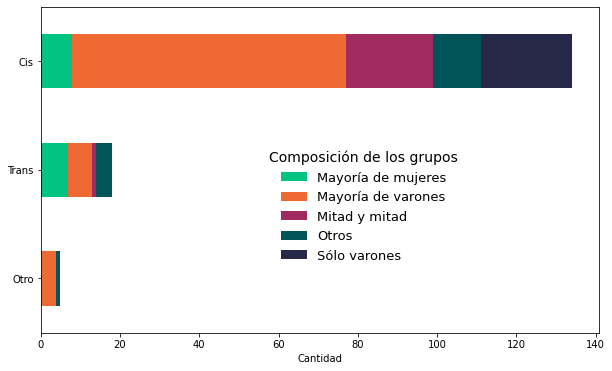

In [53]:
colors = ['#03c383','#ef6a32','#a12a5e', '#01545a', '#26294a']
fig = (pd.crosstab(index=df1['identidad'],columns=df1['grupo'])).sort_values(by=['Mayoría de varones']).plot.barh(stacked=True, figsize=(10,6), color=colors)
plt.legend(title='Composición de los grupos', title_fontsize=14, loc=(.4,.2), fontsize=13, frameon=False)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()

###Catplot

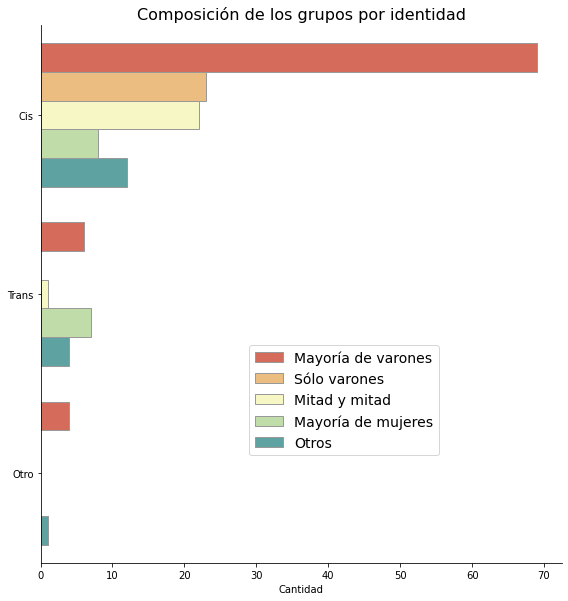

In [54]:
fig = sns.catplot(y="identidad", hue="grupo", kind="count",
            palette="Spectral", edgecolor=".6",
            data=df1, height=8, legend=False, order=['Cis', 'Trans','Otro'])
plt.title('Composición de los grupos por identidad', fontsize=16)
plt.legend(title='', loc=(.4,.2), fontsize=14)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()

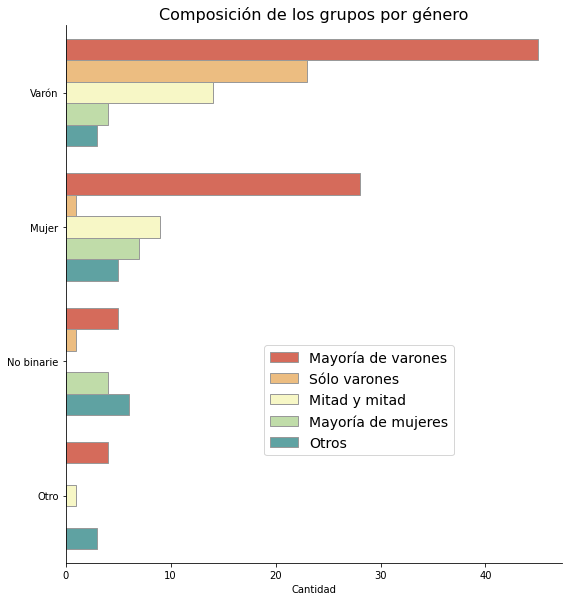

In [55]:
fig = sns.catplot(y="genero", hue="grupo", kind="count",
            palette="Spectral", edgecolor=".6",
            data=df1, height=8, legend=False, order=['Varón', 'Mujer','No binarie','Otro'])
plt.title('Composición de los grupos por género', fontsize=16)
plt.legend(title='', loc=(.4,.2), fontsize=14)
plt.xlabel('Cantidad')
plt.ylabel('')
plt.show()

##Paises

In [56]:
# Hacer un mapa vacío
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

In [57]:
paises_cuenta = (df1['residencia'].value_counts()[:].to_list())

In [58]:
paises = (df1['residencia'].value_counts().index.to_list())
paises

['Argentina',
 'España',
 'México',
 'Perú',
 'Chile',
 'Francia',
 'Panamá',
 'Estados Unidos',
 'Reino Unido']

In [59]:
mapa = pd.DataFrame({'lat':[-34.9,39.6,-10.3,23.8, -26.5, 8.6, 55.1, 39.7, 46.7],
                     'lon': [-65.5, -3.3,-75.4,-102.7, -71.1, -80.0, -2.9, -100.6, 1.8],
                     'paises': paises, 
                     'cant': [116,50,40,40,40,20,20,20,20]})
mapa

,lat,lon,paises,cant
0,-34.9,-65.5,Argentina,116
1,39.6,-3.3,España,50
2,-10.3,-75.4,México,40
3,23.8,-102.7,Perú,40
4,-26.5,-71.1,Chile,40
5,8.6,-80.0,Francia,20
6,55.1,-2.9,Panamá,20
7,39.7,-100.6,Estados Unidos,20
8,46.7,1.8,Reino Unido,20


In [60]:
# add marker one by one on the map
for i in range(0,len(mapa)):
   folium.Circle(
      location=[mapa.iloc[i]['lat'], mapa.iloc[i]['lon']],
      popup=mapa.iloc[i]['paises'],
      radius=float(mapa.iloc[i]['cant']*10000),
      color='#900C3F ',
      fill=True,
      fill_color='#900C3F ').add_to(m)

# Show the map again
m

##Plotly

In [61]:
fig = px.histogram(df1, x="edad", nbins=40, width=800,
                   labels={'edad':'Edades'},
                   color_discrete_sequence=['darkcyan'])
fig.update_layout(
    title={
        'text': "Cantidad de participantes por edad",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_yaxes(title=None)
fig.show()

In [62]:
fig = px.histogram(df1, x="genero", category_orders=dict(genero=['Mujer', 'Varón', 'No binarie', 'Otro']),
                   width=600, color_discrete_sequence=['indianred'])
fig.update_layout(
    title={
        'text': "Cantidad de participantes por género",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_xaxes(title=None)
fig.update_yaxes(title=None)
fig.show()

In [63]:
labels = df1['genero'].value_counts().index
values = df1['genero'].value_counts().values

fig = px.pie(
             df, values=values, names=labels, width=600,
             color_discrete_sequence=px.colors.sequential.RdBu,
             )
fig.update_layout(
    title={
        'text': "Cantidad de participantes por género",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [64]:
fig = px.violin(df1, y="edad", x="genero", color="genero",
          color_discrete_sequence=px.colors.qualitative.Prism_r, hover_data=df1.columns,
          width=900, category_orders={'genero':['Mujer','Varón','No binarie','Otro']})
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
    title='Género'
))
fig.update_xaxes(title=None)
fig.update_yaxes(title='Edad')
fig.show()

In [111]:
import plotly.graph_objects as go

a=pd.crosstab(index=df1['genero'],columns=df1['grupo']).sort_values(by=['Mayoría de varones'], ascending=False)
x=df1['genero'].value_counts().index

fig = go.Figure(go.Bar(x=x, y=a.loc[:,'Mayoría de mujeres'], name='Mayoría de mujeres'))
fig.add_trace(go.Bar(x=x, y=a.loc[:,'Sólo varones'], name='Sólo varones'))
fig.add_trace(go.Bar(x=x, y=a.loc[:,'Mayoría de varones'], name='Mayoría de varones'))
fig.add_trace(go.Bar(x=x, y=a.loc[:,'Mitad y mitad'], name='Mitad y mitad'))
fig.add_trace(go.Bar(x=x, y=a.loc['Otro'], name='Otro'))

fig.update_layout(barmode='stack')
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1,
    title='Grupos'))
#fig.update_xaxes(categoryorder='array', categoryarray= ['d','a','c','b'])
fig.show()